# Ch1.Introduction to Causal Inferece
1장에서는 인과추론(causal inference)의 기본 개념과 사례를 다루고 기본적인 용어들을 배운다.

---

## 1.1 인과추론의 개념
기초 통계학 강의를 수강하면, 상관관계(Correlation)는 인과관계(Causation)가 아니라는 말을 자주 듣게 된다. 이 두 개념을 혼동하면, **통알못** 취급을 받게 된다. 그런데 정작 우리는 인과관계란 무엇인가에 대해 명확하게 배우지 않았다.  
<center><i><b>통계학 수업에서 학생들은 '상관관계는 인과관계가 아니다'라고 배우게 된다. 불행히도, 통계학에서 상관관계는 인과관계가 아니라고 하면서 막상 인과관계가 무엇인지는 말해주지 않는다.</b></i></center> <br>
<center><i><b>Judea Pearl</b></i><center> <br>

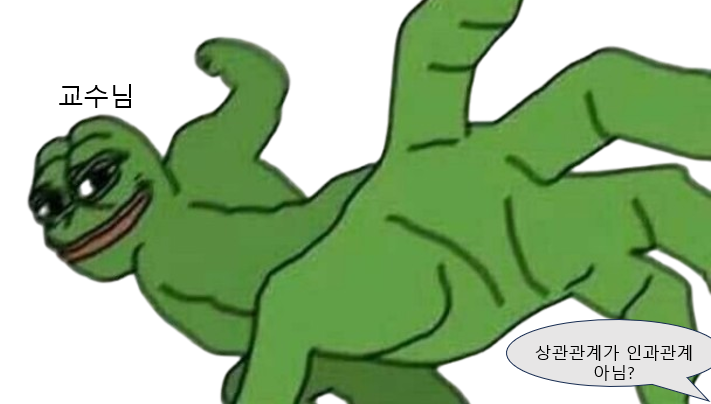 

**상관관계**는 두 개의 수치나 확률변수(Random Variable)가 같이 움직이는 관계를 말하며, **인과관계**는 변수의 변화가 다른 변수의 변화를 일으키는 관계를 말한다. 이 둘은 통계학에선 동일시하면 안되는 존재이다.  

많은 주식 투자자들이 자신의 직관이 뷸규칙적인 주가의 움직임과 인과적으로 연결되어 있다고 생각하고 그에 속아 많은 돈을 잃게 된다. 하지만 중요한 점은 **상관관계가 인과관계가 되는 경우가 존재**한다는 것이다.  
인과추론은 **상관관계로부터 인과관계를 추론하고 언제,그리고 왜 서로 다른지 이해하는 과학이다.**

---

## 1.2 인과추론의 목적
옛날부터 인간은 **왜?** 라는 질문을 해왔다. 인과추론의 유일한 목적은 현실을 이해하는 것이다. 하지만 여기에는 의사결정의 기준을 제시하는 것과 같은 규범적(normative) 요소가 자주 포함된다. 일반적으로 **원인과 결과의 관계를 알아야만 원인에 개입하여 원하는 결과를 가져올 수 있다.** 이렇게 인과추론을 산업에 적용하면 대부분 의사결정 과학의 한 분야가 되며, **개입(Intervention)** 의 영향을 이해하는게 중요하다.

---

## 1.3 머신러닝과 인과추론
인과추론으로 답을 얻으려는 질문의 유형을 살펴보면 대부분 **'만약'(What if) 와 같은 반사실적(CounterFactual)** 인 유형인 것을 알 수 있다. 머신러닝은 이러한 유형의 질문에는 취약하다. 머신러닝은 변수 간의 상관관계를 이용해서 변수들을 다른 변수에서 예측을 진행하며 예측에 사용하는 변수를 변경하지 않는 이상 머신러닝은 잘 작동하지만 **개입**이 동반되는 대부분의 의사결정에서 예측 모델로 목적을 달성하는 것은 매우 어려운 일이다. 하지만 머신러닝을 단순한 예측 도구가 아닌 강력한 모델의 도구 상자라는 각도에서 접근하면, 인과추론의 목표에 어떻게 머신러닝이 연결되는지 이해할 수 있을 것이다. 추후 머신러닝과 인과추론을 함께 사용할 때 주의사항과 머신러닝 알고리즘이 어떻게 인과추론에 활용될 수 있는지 배운다.

---

## 1.4 상관관계와 인과관계

상관관계가 인과관계를 의미하지 않는다는 것은 직관적으로 이해할 수 있다. 예시로 온라인 커머스 기업을 운영한다고 가정해보자. 중소기업들은 온라인 플랫폼을 활용하여 제품을 광고하고 판매한다. 만약 가격할인이 판매량에 미치는 영향을 파악하고자 한다. 더 많이 판매해 얻는 이익이 더 저렴하게 얻는 손실을 상쇄할 때, 가격을 할인하면 좋다는 의사결정을 할 수 있다. 이는 **인과관계**에 관한 문제이다. 여러 어린이 장난감 기업의 데이터를 활용해서 할인이 좋은 의사결정인지 판단해본다.

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/xmas_sales.csv"
data = pd.read_csv(url)

data.head()

,store,weeks_to_xmas,avg_week_sales,is_on_sale,weekly_amount_sold
0,1,3,12.98,1,219.60
1,1,2,12.98,1,184.70
2,1,1,12.98,1,145.75
3,1,0,12.98,0,102.45
4,2,3,19.92,0,103.22


- store : 상점의 ID
- weeks_to_xms : 크리스마스까지 남은 기간(주)
- avg_week_sales : 12월 각 상점의 주간 판매량
- is_on_sale : 해당 주간 기업의 가격할인 진행 여부 (진행:1, 미진행:0)

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 분석단위</strong><br>
    인과추론 연구에서 분석단위(unit of analysis)는 일반적으로 개입(처치)하려는 대상이다. 새로운 제품이 유저 잔존(User retention)에 미치는 영향을 분석할 때처럼, 분석단위는 대부분 사람이다.<br>
    하지만 다른 유형의 분석단위를 사용하기도 하며 이번 예시에서 분석단위는 기업이다.
</div>

### 1.4.1 처치와 결과
이제 장난감 할인 데이터와 함께 첫 번째 기술적인 내용을 살펴본다. $T_{i}$는 실험 대상 $i$의 처치 여부를 나타낸다. 여기서 **처치(Treatment)** 란 구하려는 효과에 대한 개입을 나타낸다. 해당 예시에서 처치는 가격 할인이다.
$$
T_i = 
\begin{cases} 
1 & \text{실험대상} i \text{가 처치 받은 경우} \\ 
0 & \text{실험대상} i \text{가 처치 받지 않은 경ㅇ }
\end{cases}
$$

필자가 영향을 주려는 변수인 주간 판매량은 **결과(outcome)** 라고 부른다. 또한 실험 대상 $i$의 결과는 $Y_{i}$로 표기한다. '처치'와 '결과'라는 두 개념을 사용하여 인과추론의 목표를 재정의하면, $T$가 $Y$에 미치는 영향을 학습하는 과정이라고 볼 수 있다. 위의 사례에서는 할인 여부가 주간 판매량에 미치는 효과를 파악하는 것이다.  
<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 처치 표기법</strong><br>
    이 책의 후반부나 다른 자료에서는 종종 처치를 T 대신 D로 표기하는데 D는 인과적인 문제에 시간 차원이 포함되었을 때 혼동을 피하려고 사용하는 표기법이다.<br>
</div>


### 1.4.2 인과추론의 근본적인 문제

**인과추론의 근본적인 문제**는 동일한 실험 대상이 처치를 받은 상태와 받지 않은 상태를 동시에 관측할 수 없다는 점이다. 따라서 인과추론은 **Missing Data**에 관한 것이라는 말도 있다. 예제로 돌아가서 처치에 따른 결과를 그래프로 그려본다.

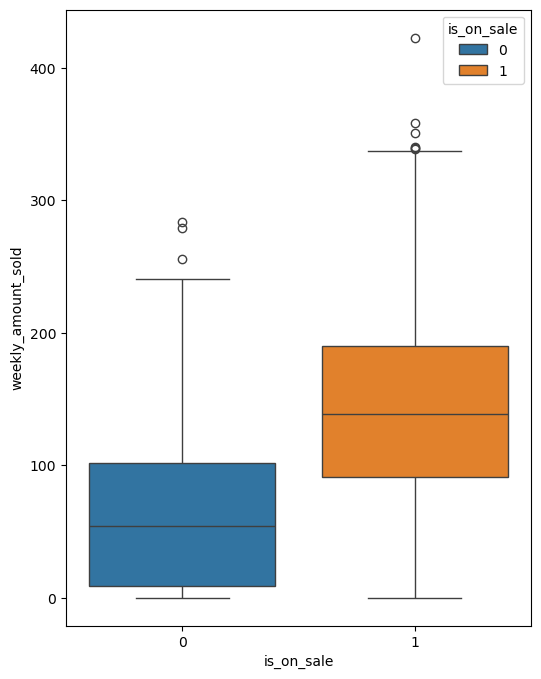

In [15]:
plt.figure(figsize=(6,8))
sns.boxplot(x="is_on_sale", y="weekly_amount_sold",hue='is_on_sale', data = data)
plt.show()

할인을 해서 가격이 낮아지면 사람들은 더 많이 구해가게 된다. 인과추론은 도메인 지식과 밀접한 관련이 있다. 상품을 할인하고 광고를 노출하면 고객들은 더 많이 구하게 된다. 하지만 이토록 판매율이 급증하는 부분이 있다면 도메인 지식을 바탕으로 주의를 기울여야 한다. 위의 그래프를 보면 할인할 때 판매량은 평균적으로 약 150 정도 더 높아지며, 할인하지 않을 떄 판매량이 0~50 정도임을 고려한다면, 이는 비정상적으로 높은 수치일수도 있다.  
이는 상관관계를 인과관계로 착각하고 있음을 알 수 있다. 판매량이 많게 나타난 이유는 상품을 가장 많이 판매하는 대기업들이 더 공격적으로 가격을 낮출 여유가 있기 때문이거나, 고객들이 가장 많이 구매하는 시기인 크리스마스쯤 할인을 진행한 영향일 수도 있다.  
여기서 중요한 점은, 동일한 회사(실험대상)에서 할인이 진행되는 상황과 그렇지 않은 상황을 동시에 관측할 수 있어야만 가격할인이 판매량에 미치는 실제 효과를 확신할 수 있다는 점이다. 이러한 두 가지 **반사실적(Counterfactual)** 상황을 비교함으로써 가격할인 효과를 파악할 수 있지만, 동일 대상의 두 상황을 우리는 동시에 관측할 수 없으므로 다른 방법을 찾아야 한다.

### 1.4.3 인과모델

이제 인과관계에 대한 Notation을 설명한다.

**인과모델**은 화살표(←)로 표시하는 일련의 할당 메커니즘이다. 이 매커니즘은 $u$를 사용해 모델 외부의 변수를 나타내며 변수 $u$가 어떻게 생성되었는지 따로 설명하지 않는다. 변수 $u$ 외 다른 모든 변수는 중요하므로 모델에 포함한다.  
다음으로, 한 변수를 다른 변수에 매핑하는 함수 $f$가 있다. 다음 인과모델을 예시로 든다.
$$
T ← f_{t}(u_{t}) \\
Y ← f_{y}(T,u_{y})
$$
첫 번쨰 식에서 모델링하지 않는 변수 집합 $u_{t}$(**외부변수**)가 함수 $f_{t}$를 통해 처치변수 $T$를 유발하는 원인이 된다. 두 번째 식에서 처치변수 $T는 다른 변수 집합 $u_{y}$(마찬가지로 모델링하지 않는 변수)와 함께 함수 $f_{y}$를 통해 결과 $Y$를 유발한다. 해당 수식에서 $u_{y}$는 결과가 단순히 처치 변수만으로 결정되지 않음을 나타낸다. 즉, **모델링하지 않기로 선택한 변수라 하더라도 결과에 영향을 미친다.**  
가격할인 예시에 적용하면, 주간 판매량은 처치에 해당하는 할인 여부 및 특정되지 않은 요인들인 $u$ 때문에 발생한다. 변수 $u$의 목적은 **모델에 포함된 변수로는 아직 설명되지 않는 변수들의 모든 변동을 설명**하는 것이다. 이러한 변수는 **내생변수**라고도 한다.  
해당 예시에서는 가격할인이 모델 내에 없는 요인들(기업 규모 등) 때문에 유발된다고 볼 수 있다.  
$$
IsOnSales ← f_{t}(u_{t}) \\
AmountSold ← f_{y}(IsOnSales,u_{y})
$$
등호 (=) 대신 화살표를 사용하여 인과관계의 **비가역성(Non-reversibility)** 를 분명하게 표시했다. 전통적인 대수학(Algebra)와 달리, 원인과 효과의 비가역성 때문에 인과모델을 다룰 때는 등호 주변으로 간단하게 변수를 옮길 수 없다는 점을 기억하자.  
더 많은 변수를 사용해서 모델링하려면 $u$에서 변수를 꺼내서 명시적으로 인과모델에 포함시키면 된다. 이로써 해당 변수들을 모델 안에서 설명할 수 있게 된다. 가격할인 예시에서, 할인하는 경우와 할인하지 않는 경우의 차이가 큰 이유는 대기업들이 더 공격적으로 할인을 진행할 수 있기 때문일 수 있다고 언급했다.  
이전 모델에는 $BusinessSize$가 포함되지 않았고, 해당 변수는 다른 변수들과 함께 $u$에 포함되어 있다. 하지만 해당 변수를 포함해 다음과 같이 모델링할 수 있다.
$$
BusinessSize ← f_{s}(u_{s}) \\
IsOnSales ← f_{t}(BusinessSize,u_{t}) \\
AmountSold ← f_{y}(IsOnSales,BusinessSize,u_{y})
$$
추가 내생변수($BusinessSize$)를 포함하기 위해, 먼저 해당 변수가 어떻게 생성되었는지 나타내는 수식을 추가하도록 한다. 그 다음  $BusinessSize$를 모델 외부변수로 다루지 않도록 $u_t$에서 제외한다. 두 번째 수식은 $IsOnSales$의 원인이 $BusinessSize$를 식에 추가해볼 수 있다. 이는 대기업들이 더 많이 판매한다는 생각을 표현한 식이다. 정리하자면, $BusinessSize$는 처치($IsOnSales$)와 결과($AmountSold$) 모두의 공통 원인이 된다.  
다음과 같이 통계학과 익숙한 방식과 연결해보자.
$$
AmountSold_i=\beta_0+\beta_1IsOnSales_i+\beta_2BusinessSize_i+e_i
$$
언뜻 보면 다르지만, 자세히 살펴보면 우리의 인과모델과 매우 비슷한 것을 알 수 있다.  
1. 이전 모델에서의 마지막 수식에서 $f_y$함수를 어떻게 대체하는지 살펴보면, 내생변수 $IsOnSales$와 $BusinessSize$가 선형적으로 결합한 결과로 $AmountSold$를 만드는 것을 알 수 있다. 즉, 해당 선형회귀모형은 이전 모델보다 더 많은 가정을 하며, 변수 간의 관계에 함수 형태(여기서는 선형)을 부여한다고 볼 수 있다.  
2. 독립(내생)변수인 $IsOnSales$와 $BusinessSize$가 어떻게 생성되는지 나타내지 않는다.  
3. 선형회귀모형은 할당 연산자(←) 대신 등호(=)를 사용한다. (하지만 두 표기법을 번갈아가며 사용한다.)

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 외생변수와 내생변수</strong><br>
    원서에서는 외부변수를 <b>외생변수(Exogenous variable)</b>라고 표현했으나, <b>외생변수와 내생변수</b>라는 용어는 통계/계량경제학에서 다른 의미로 사용된다.<br>
    - <b>외생변수</b> : 관측되지 않은 (시스템 내에 포함되지 않은) 어떠한 다른 변수에도 영향을 받지 않는 변수. 즉, 인과모델 내에서 명시적으로 고려하는 변수라 하더라도, 관측되지 않은 다른 변수에 영향을 받지 않는 변수를 의미한다. <br><br>
    - <b>내생변수</b> : 통계학에서 내생변수는 관측되지 않은 (시스템 내에 포함되지 않은) 요인에 의해 영향을 받는 변수를 의미한다. 가격할인 예시에서는 IsOnSales가 내생변수이다. 또한 관측되지 않은 요인(u)에 의해 영향을 받기 때문에 BusinessSize도 내생변수라고 할 수 있다.
</div>

### 1.4.4 개입
인과모델이 있다면 해당 모델을 고치고 개선해서 인과적 질문의 답을 찾을 수 있다. 이를 공식 용어로 **개입(Intervention)** 이라고 부른다. 예를 들어, 아주 간단한 인과모델을 사용해서 모든 실험 대상이 처치 $t_{0}$를 받도록 하는 상황을 가정해보자. 이렇게 하면 $T$에 대한 자연적 원인을 제거하므로 상수로 대체할 수 있다.
$$
T ← t_{0} \\
Y ← f_{y}(T,u_{y})
$$
이는 **'처치 $t_{0}$로 설정한다면 결과 $Y$에 어떤 일이 일어날까'** 라는 질문에 답하는 사고 실험이다. 실제로 처치에 개입할 필요는 없다(개입할 수 있지만, 나중에 다룬다). 인과추론에서 개입을 $do(.)$ 연산자를 활용해서 나타낼 수 있다. $T$에 개입해서 어떤 일이 일어날지를 추론하고 싶다면 $do(T=t_{0})$로 표현할 수 있다. $do(.)$ 연산자는 개입을 표현하며, 주어진 현상을 그대로 관측하는 것이 아닌 개입(doing)한다는 의미로 이해할 수 있다.  
$do(.)$ 연산자를 통해 상관관계와 인과관계가 다른 이유를 한눈에 알 수 있다. 예시에서 가격 할인을 한 회사의 판매량의 기댓값 $E[AmountSold |IsOnSales =1]$이 높으면, 가격을 할인하도록 개입한 경우의 판매량 기댓값 $E[AmountSold |do(IsOnSales =1)]$이 과대 추정될 수 있다고 위에서 언급했다. 이때 첫 번째 경우처럼 가격을 할인하기로 결정한 회사는 대기업일 확률이 높다. 반면 $E[AmountSold |do(IsOnSales =1)]$은 모든 회사가 가격을 할인하도록 통제했을 때 어떤 일이 발생했을지를 나타낸다.  
중요한 것은 일반적으로 다음 식과 같이 가격을 할인한 회사의 판매량에 대한 조건부 기댓값과, 할인하도록 통제한 회사의 판매량에 대한 조건부 기댓값은 **다르다는 점이다.**
$$
E[\ AmountSold\ |\ IsOnSales =1\ ] \neq E[\ AmountSold\ |\ do(IsOnSales =1)\ ]
$$

선택(selection)과 개입의 관점에서 이 두 개념의 차이를 살펴보자. 선택 측면에서 할인이 조건으로 주어질 때는 실제로 가격을 할인하기로 선택한 회사들의 하위 표본 판매량을 측정한다. 반면 $do(IsOnSales) 개입이 조건으로 주어질 때는 모든 회사가 가격을 할인하도록 통제한 다음에 전체 표본에서 판매량을 측정한다.
<center>

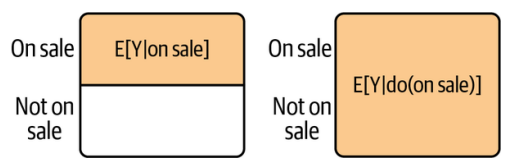
<p style="text-align:center; font-style:italic;">선택은 처치에 따라 표본을 필터링하고, 개입은 전체 표본의 처치 여부를 통제한다.</p>

</center>

$do(.)$연산자는 관측된 데이터에서 항상 얻을 수 없는 인과 추정량(Causal estimand)을 정의하는데 사용한다. 예제에서는 모든 기업이 가격을 할인하도록 강제하지 않았으므로, 모든 회사의 $do(IsOnSales=1)$인 상황을 관측할 수 없다. 즉, $do(.)$ 연산자는 구하려는 인과 추정량을 분명하게 표현하는데 사용할 수 있는 이론적 개념으로 매우 유용하다. 대부분의 인과추론은 인과 추정량에 대한 이론적 표현에서 직접 관측할 수 없는 부분을 제거하기 위한 일련의 과정으로 이를 **식별(identification)** 이라고 부른다.

### 1.4.5 개별 처치효과
$do(.)$ 연산자를 사용하면 개별 실험 대상 $i$에 처치가 결과에 미치는 영향인 **개별 처치효과(individual treatment effect,ITE)** 를 표현할 수 있다. 다음 식과 같이 두 개입의 차이로 나타낼 수 있다.
$$
\tau_{i} = Y_{i}|do(T=t_{1})\ -\ Y_{i}|do(T=t_{0})
$$
즉, 각 실험 대상 i에 대한 처치가 $t_{0}$에서 $t_{1}$로 바뀔 때의 효과 $\tau_{i}$는 $t_{0}$와 비교하여 $t_{1}$ 하에서의 결과 차이를 나타낸다. 이를 사용하여 판매량에서 세일실행 여부를 0(No)에서 1(Yes)로 바꿀 때의 효과도 추론할 수 있다.
$$
\tau_{i} = AmountSold_{i}|do(IsOnSales=1)\ -\ AmountSold_{i}|do(IsOnSales=0)
$$
인과추론의 근본적인 문제 때문에 앞의 식 중 한 가지 항에 대해서만 관측할 수 있다. 따라서 이론적으로 해당 식을 표현할 수 있다고 해도, 반드시 데이터에서 이를 찾을 수 있다는 뜻은 아니다.

### 1.4.6 잠재적 결과
$do(.)$ 연산자와 함께, 인과추론에서 가장 흥미롭고 널리 사용하는 개념인 반사실 또는 **잠재적 결과(Potential outcome)** 도 정의할 수 있다.  
$$
Y_{ti} = Y_i|do(T_i=t)
$$
이는 '처치가 $t$인 상태일 때, 실험 대상 $i$의 결과는 $Y$가 될 것이다.'를 의미한다. 때로는 수식의 첨자가 너무 복잡해지므로 함수 표기법을 사용하여 잠재적 결과를 정의한다.
$$
Y_{ti} = Y(t)_i
$$
범주가 두 개인 이진 처치(처치 또는 미처지)에 관한 이야기할 때, 처치 받지 않은 실험 대상 $i$의 잠재적 결과를 $Y_{0i}$로, 처치 받는 동일 대상의 $i$의 잠재적 결과를 $Y_{0i}$로, 처치 받는 동일 대상 $i$의 잠재적 결과를 $Y_{1i}$로 표기한다. 또한, 관측할 수 있는 한 가지 잠재적 결과를 **사실적 결과(Factual outcome)** 로, 관측할 수 없는 다른 한 가지 결과를 **반사실적 결과(Counterfactual outcome)** 로 지칭한다.  
예를 들어, 실험 대상 $i$가 처치 받은 후 어떤 일이 일어나는지 사실적 결과 $Y_{1i}$를 관측할 수 있다. 반대로 실험 대상 $i$가 처치 받지 않으면 어떤 일이 일어날지 알 수 없다. 즉, $Y_{0i}$는 반사실적 결과이므로 관측할 수 없다.
$$
Y_i = 
\begin{cases} 
Y_{1i} & \text{실험 대상} i \text{가 처치 받은 잠재적 결과} \\ 
Y_{0i} & \text{같은 대상} i \text{가 처치 받지 않은 잠재적 결과}
\end{cases}
$$

잠재적 결과를 다음과 같이 표현할 수도 있다.
$$
Y_i = T_iY_{1i}+(1-T_{i})Y_{0}=Y_{0i}+(Y_{1i}-Y_{0i})T_i
$$
예제로 돌아가서 $AmountSold_{0i}$는 회사 $i$가 가격을 할인하지 않았을 경우 판매량을 나타내고, $AmountSold_{1i}$는 할인했을 경우 판매량을 나타낸다. 또한 다음과 같이 잠재적 결과에 따라 회사 $i$의 인과효과를 정의할 수 있다.  
$$
\tau_{i} = Y_{1i}-Y_{0i}
$$

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 인과추론에 대한 가정</strong><br>
    인과추론에는 항상 가정이 동반된다. 가정은 데이터가 어떻게 생성되었는지에 관한 믿음을 표현할 때 사용한다. 중요한 점은, 일반적으로 가정은 데이터로 검증할 수 없기 때문에 필요한 것이다. 매번 가정을 찾기는 쉽지 않다.<br>
</div>


### 1.4.7 일치성 및 SUTVA
앞의 식에는 두 가지 숨겨진 가정이 있다. 첫 번째 가정은 잠재적 결과가 처치와 일치성이 있어야 함을 의미한다. 첫 번째 가정은 **잠재적 결과가 처치와 일치성이 있어야 함**을 의미한다. 즉, $T_i=t$일 때, $Y_i(t)=Y$이다. 이는 $T$로 지정된 처치 외에 숨겨진 여러 가지 형태의 처지는 존재하지 않는다는 뜻이다. 정리하자면, **일치성(consistency)** 가정은 두 가지 경우에 위배될 수 있다.  
- 1. 처치를 여러 번 했는데도 그 중 일부만 고려했다면 가정이 위배될 수 있다.  
할인 쿠폰이 매출에 미치는 영향에 관심이 있다고 가정했을 때, 처치는 고객이 쿠폰을 받았는지 안 받았는지 두 가지 방식으로 간주할 수 있다. 하지만, 실제로는 여러 번의 할인을 시도했다면, 일치성 가정을 위배할 수 있다.  
- 2. 처치가 잘못 정의된 경우에도 일치성 가정이 위배될 수 있다.